# Benfords Law
According to Benfords Law, the distribution of numbers in a very large dataset should approximately be distributed as $log_{10}(\frac{j+1}{j})$.
I would consider 50.000 news articles to be a rather large, but slightly biased dataset. The digit 2 will probably appear much more often than the above distribution says (21st century).

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import re
import os
os.listdir('../input')

['articles1.csv', 'articles3.csv', 'articles2.csv']

In [8]:
df = pd.read_csv('../input/articles1.csv')
df.head(5)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


## Parse and find all numbers in 50.000 news articles (with titles)

In [31]:
numbers = []
for i, row in df.iterrows():
    article_txt = row['content']
    title_txt = row['title']
    
    article_numbers = re.findall(r'[1-9][0-9]*', article_txt)
    title_numbers = re.findall(r'[1-9][0-9]*', title_txt)
    
    numbers.extend(article_numbers)
    numbers.extend(title_numbers)

## Count first and second digits of all numbers

In [33]:
first_digit = {}
second_digit = {}

for num in numbers:
    try:
        first_digit[num[0]] += 1
    except KeyError:
        first_digit[num[0]] = 1
    
    try:
        try:
            second = num[1]
        except IndexError:
            continue
        
        second_digit[num[1]] += 1
    except KeyError:
        second_digit[num[1]] = 1

## Plot results


Text(0,0.5,'Distribution')

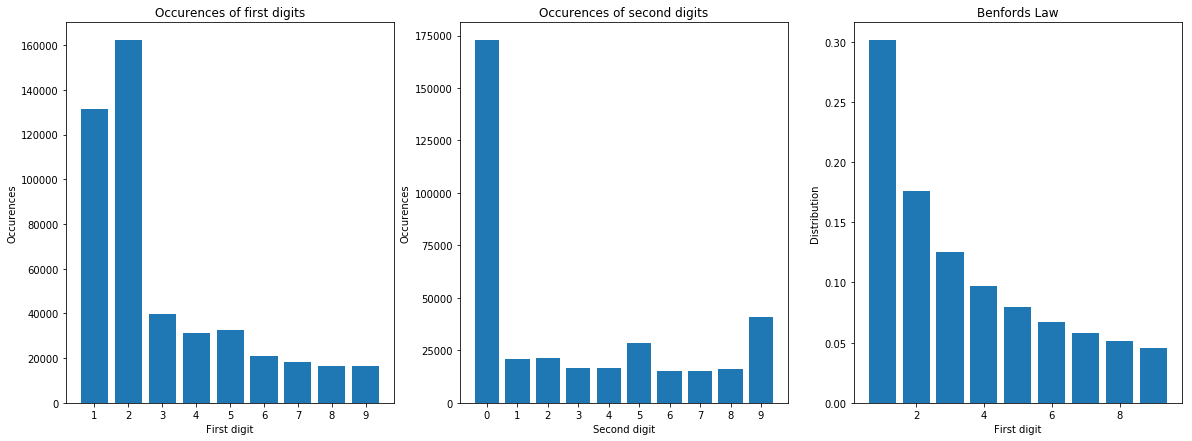

In [65]:
plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.bar([num for num in first_digit], [first_digit[num] for num in first_digit])
plt.title('Occurences of first digits')
plt.xlabel('First digit')
plt.ylabel('Occurences')

plt.subplot(132)
plt.bar([num for num in second_digit], [second_digit[num] for num in second_digit])
plt.title('Occurences of second digits')
plt.xlabel('Second digit')
plt.ylabel('Occurences')

plt.subplot(133)
plt.bar([num for num in range(1, 10)], [math.log10((num + 1) / num) for num in range(1, 10)])
plt.title('Benfords Law')
plt.xlabel('First digit')
plt.ylabel('Distribution')

As expected the digit 2 appears much more often than the distribution says, but apart from that, the distribution seems reasonable considering that our dataset is of course biased since we only included news articles.